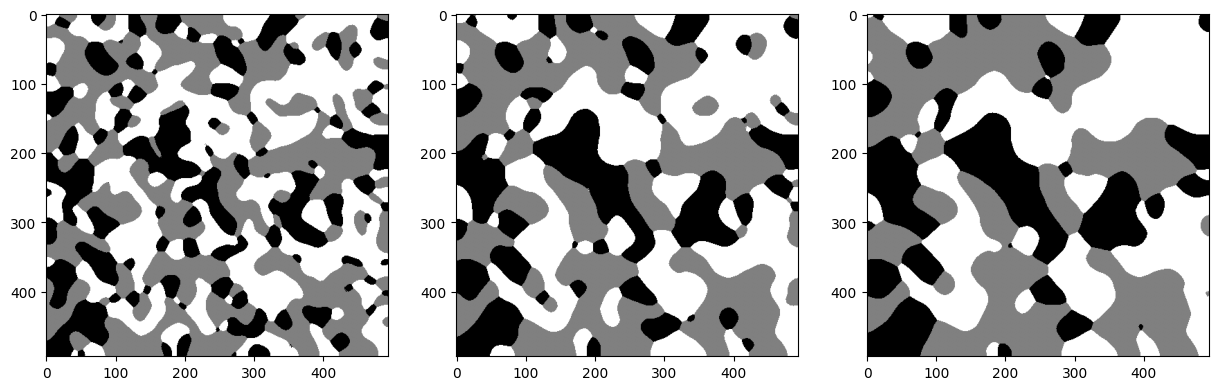

In [7]:
 # %% Boundary length exercise
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

# Read data
in_dir = 'data/fuel_cells/'
imgs = [skimage.io.imread(in_dir + f'fuel_cell_{i}.tif') for i in range(1, 4)]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(imgs[i], cmap='gray')

#### *1.1.2 Computing length of segmentation boundary*

Segmentation is one of the basic image analysis tasks. The length of the segmentation boundary may be used as a measure of segmentation quality. [4]

Assume that segmentation is represented by an image $S(x, y)$ which takes $n$ discrete values, i.e. $S : \Omega \to \{1, 2, \dots, n\}$, where $n$ is the number of segments. The image shown in Figure **1.7** has $n = 3$ values.

We define the length of the segmentation boundary as

$$
L(S) = \sum_{(x,y) \sim (x', y')} d \big( S(x, y), S(x', y') \big),
$$

where $(x, y) \sim (x', y')$ indicates two neighboring pixel locations, and $d$ is a metric

$$
d(a, b) =
\begin{cases} 
    0 & \text{if } a = b \\
    1 & \text{otherwise}
\end{cases}.
$$

In other words, $L(S)$ counts all occurrences of two neighboring pixels having different labels. Note that every pair of pixels should be counted once. For neighborhood, we use *4-connectivity*, i.e., we consider only the pixels to the left, right, up, and down.

### *Data*  
You may use any image with discrete pixel values. We have provided the segmentation images `fuel_cell_1.tif`, `fuel_cell_2.tif`, and `fuel_cell_3.tif`.

### *Tasks*

1. Compute the length of the segmentation boundary for all images.

2. Try avoiding loops and instead use vectorization provided by `numpy` for an efficient and compact implementation. See Figure **1.8** for a sketch of the vectorization approach.

3. Collect your code in a function that takes segmentation as an input and returns the length of the segmentation boundary as an output.


# Tasks Completion 

- <input type="checkbox" checked> **Task 1**: Compute the length of the segmentation boundary for all images.
- <input type="checkbox" checked> **Task 2**: Try avoiding loops and instead use vectorization provided by `numpy` for an efficient and compact implementation.
- <input type="checkbox" checked> **Task 3**: Collect your code in a function that takes segmentation as an input and returns the length of the segmentation boundary as an output.


1. **Compute the length of the segmentation boundary for all images.**

In [8]:
for im in imgs:
    length = 0
    for i in range(im.shape[0]-1):
        for j in range(im.shape[1]):
            length += (im[i,j]!= im[i+1,j])
    for i in range(im.shape[0]):
        for j in range(im.shape[1]-1):
            length += (im[i,j]!= im[i,j+1]) 
    print(f'Boundary length: {length}')

Boundary length: 16328
Boundary length: 10801
Boundary length: 8084


2. Try avoiding loops and instead use vectorization provided by `numpy` for an efficient and compact implementation.

In [16]:
#%% Section 1.1.2 - Task 2: Boundary length (vectorized)
for im in imgs:
    length = (im[:-1] != im[1:]).sum() + (im[:,:-1] != im[:,1:]).sum()
    print(f'Boundary length: {length}')

Boundary length: 16328
Boundary length: 10801
Boundary length: 8084


3. Collect your code in a function that takes segmentation as an input and returns the length of the segmentation boundary as an output.

In [ ]:
# %% Section 1.1.2 - Task 3: Boundary length function
def boundary_length(im):
    '''
    Computes the boundary length of an image.
    
    Parameters
    ----------
    im : ndarray
        Image.
        
    Returns
    -------
    bl : float
        Boundary length.
    '''
    return (im[:-1] != im[1:]).sum() + (im[:,:-1] != im[:,1:]).sum()


for im in imgs:
    print(f'Boundary length: {boundary_length(im)}')

for i in range(3):
    L = boundary_length(imgs[i])
    ax[i].imshow(imgs[i], cmap='gray')
    ax[i].set_title(f'L={L}')

Boundary length: 16328
Boundary length: 10801
Boundary length: 8084


: 